# Introduction

This notebook is a replication of the results from Figures 2.4 and 2.5 in Rasmussen & Williams Gaussian Processes for Machine Learning

Source: C. E. Rasmussen & C. K. I. Williams, Gaussian Processes for Machine Learning, the MIT Press, 2006, ISBN 026218253X. ⃝c 2006 Massachusetts Institute of Technology. www.GaussianProcess.org/gpml ;  http://www.gaussianprocess.org/gpml/chapters/RW.pdf 

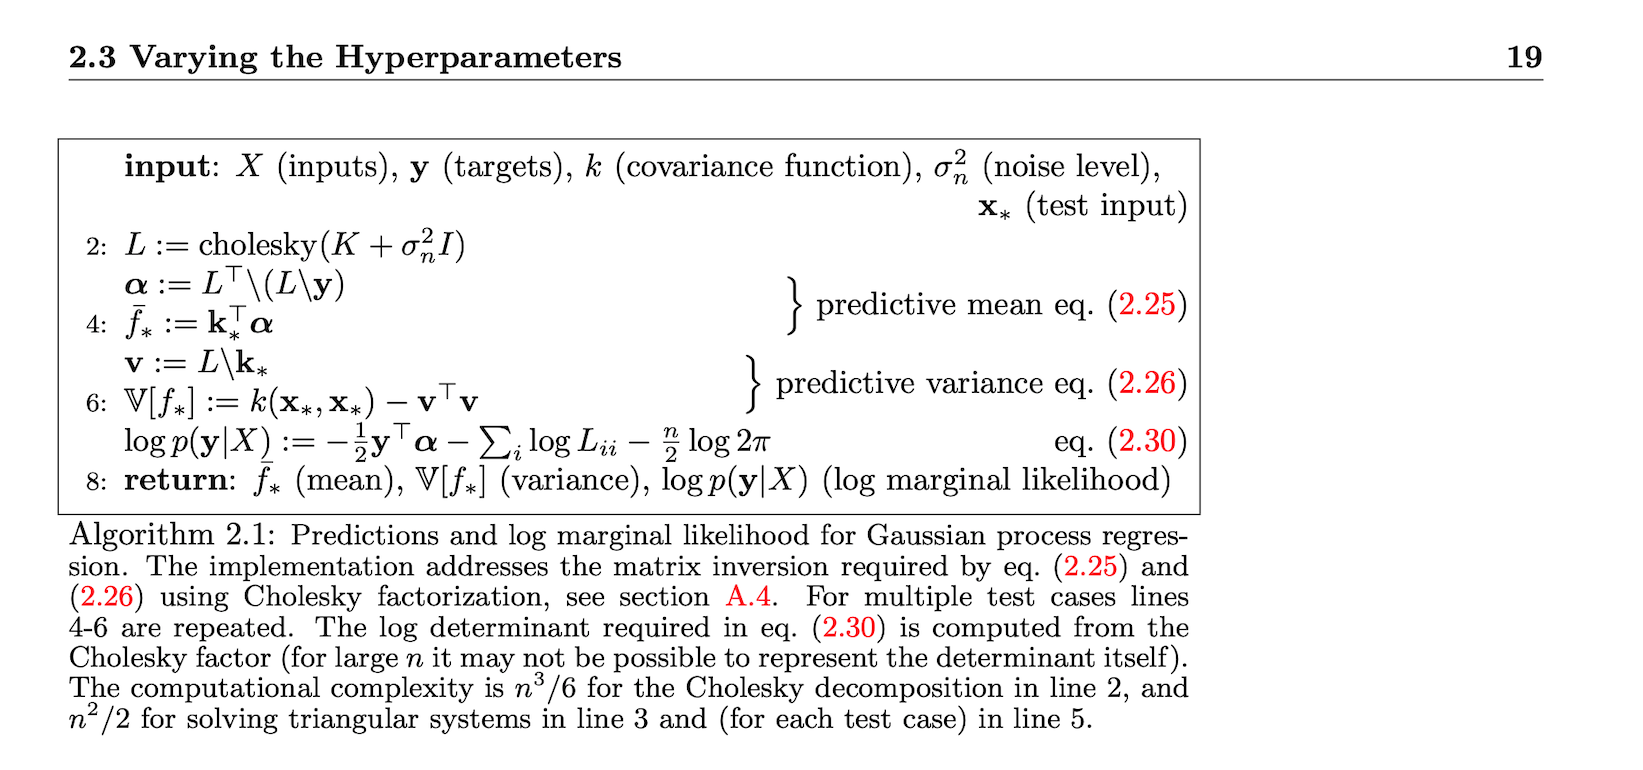

In [43]:
from IPython.display import Image
Image(filename='algorithm_2.1.png')

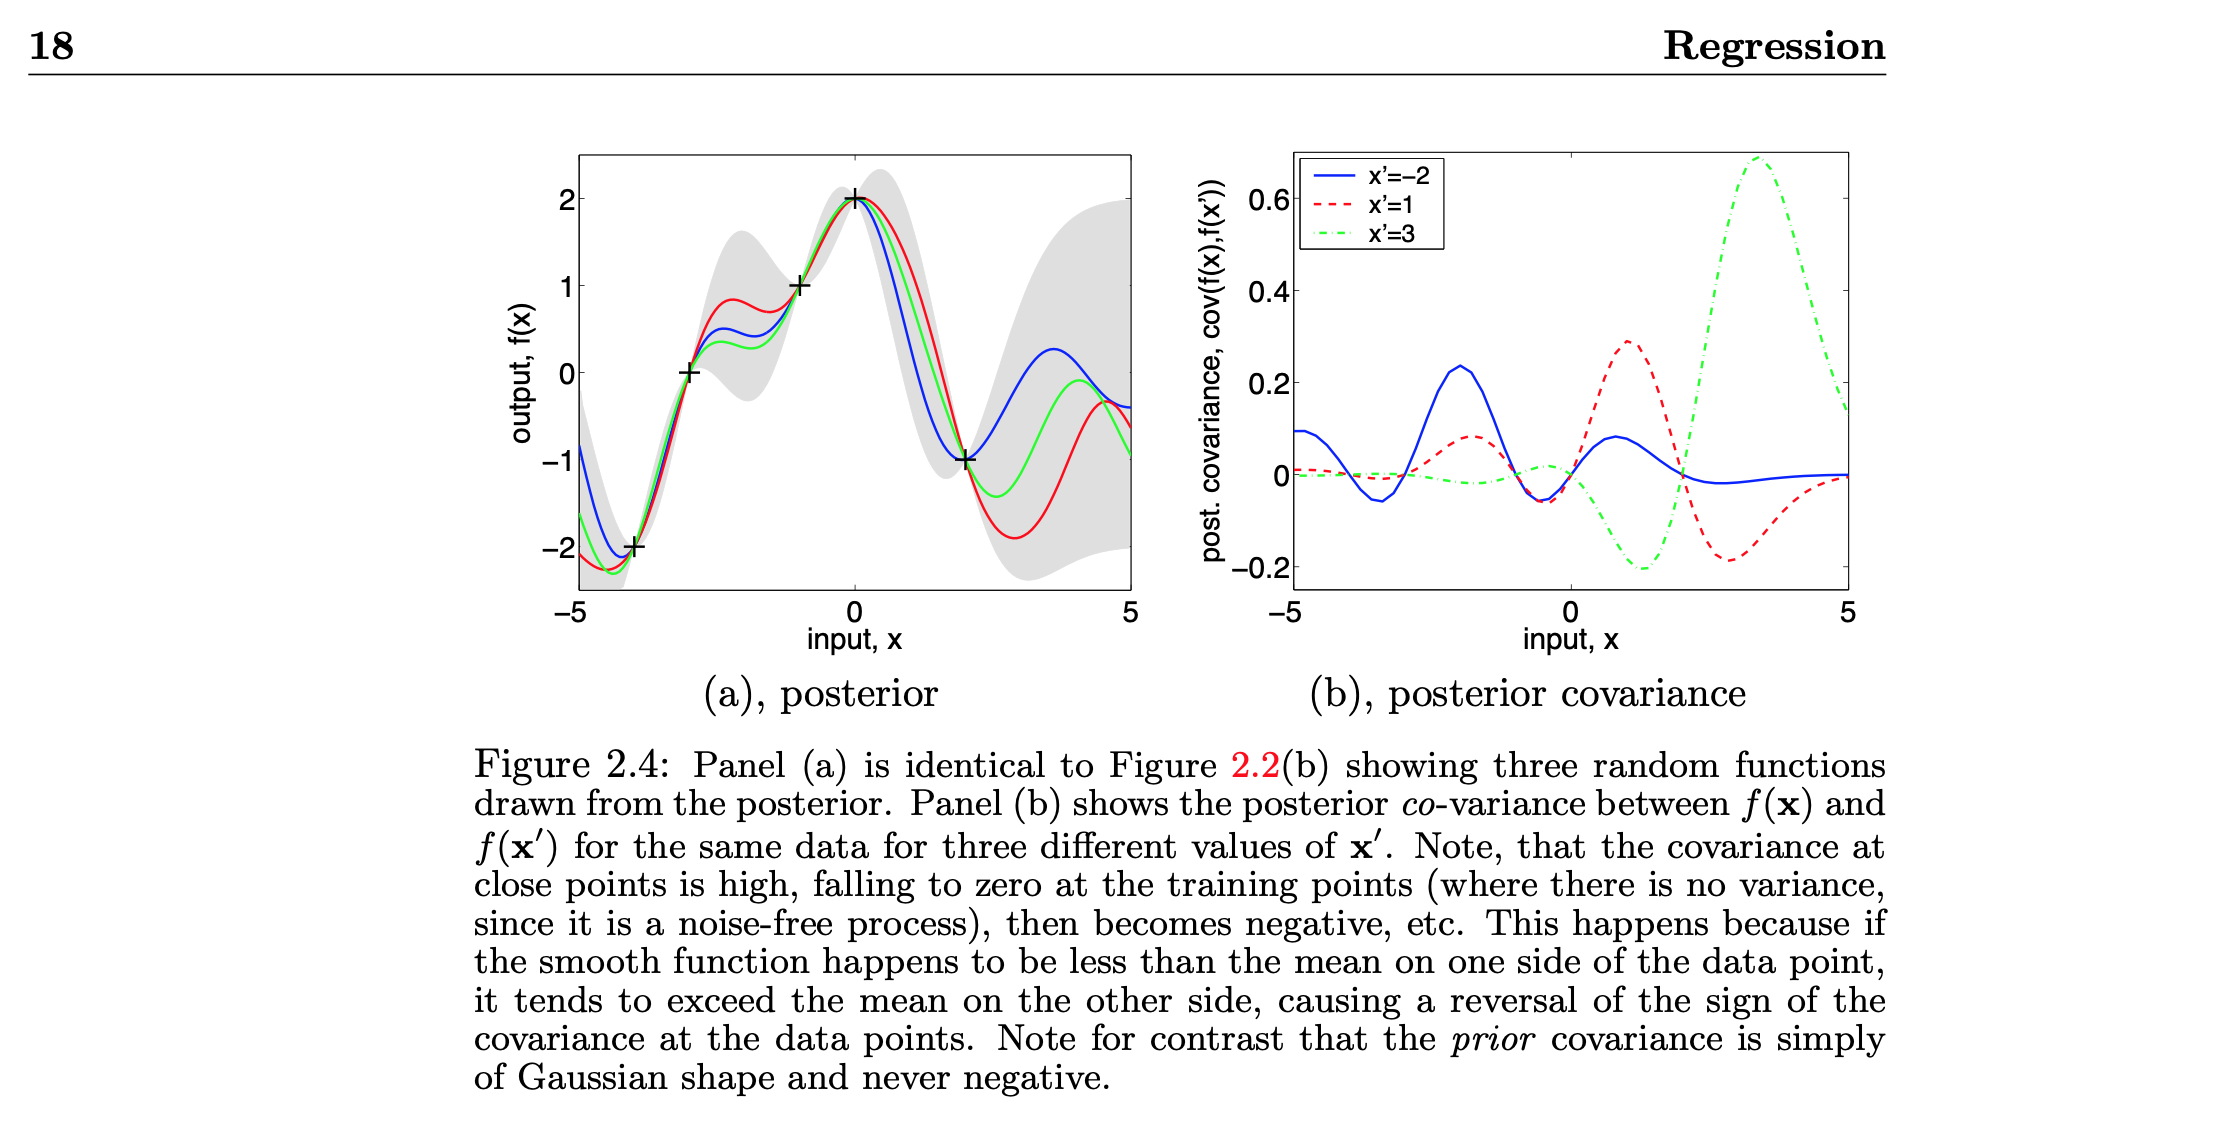

In [45]:
Image(filename='fig_2.4.png')

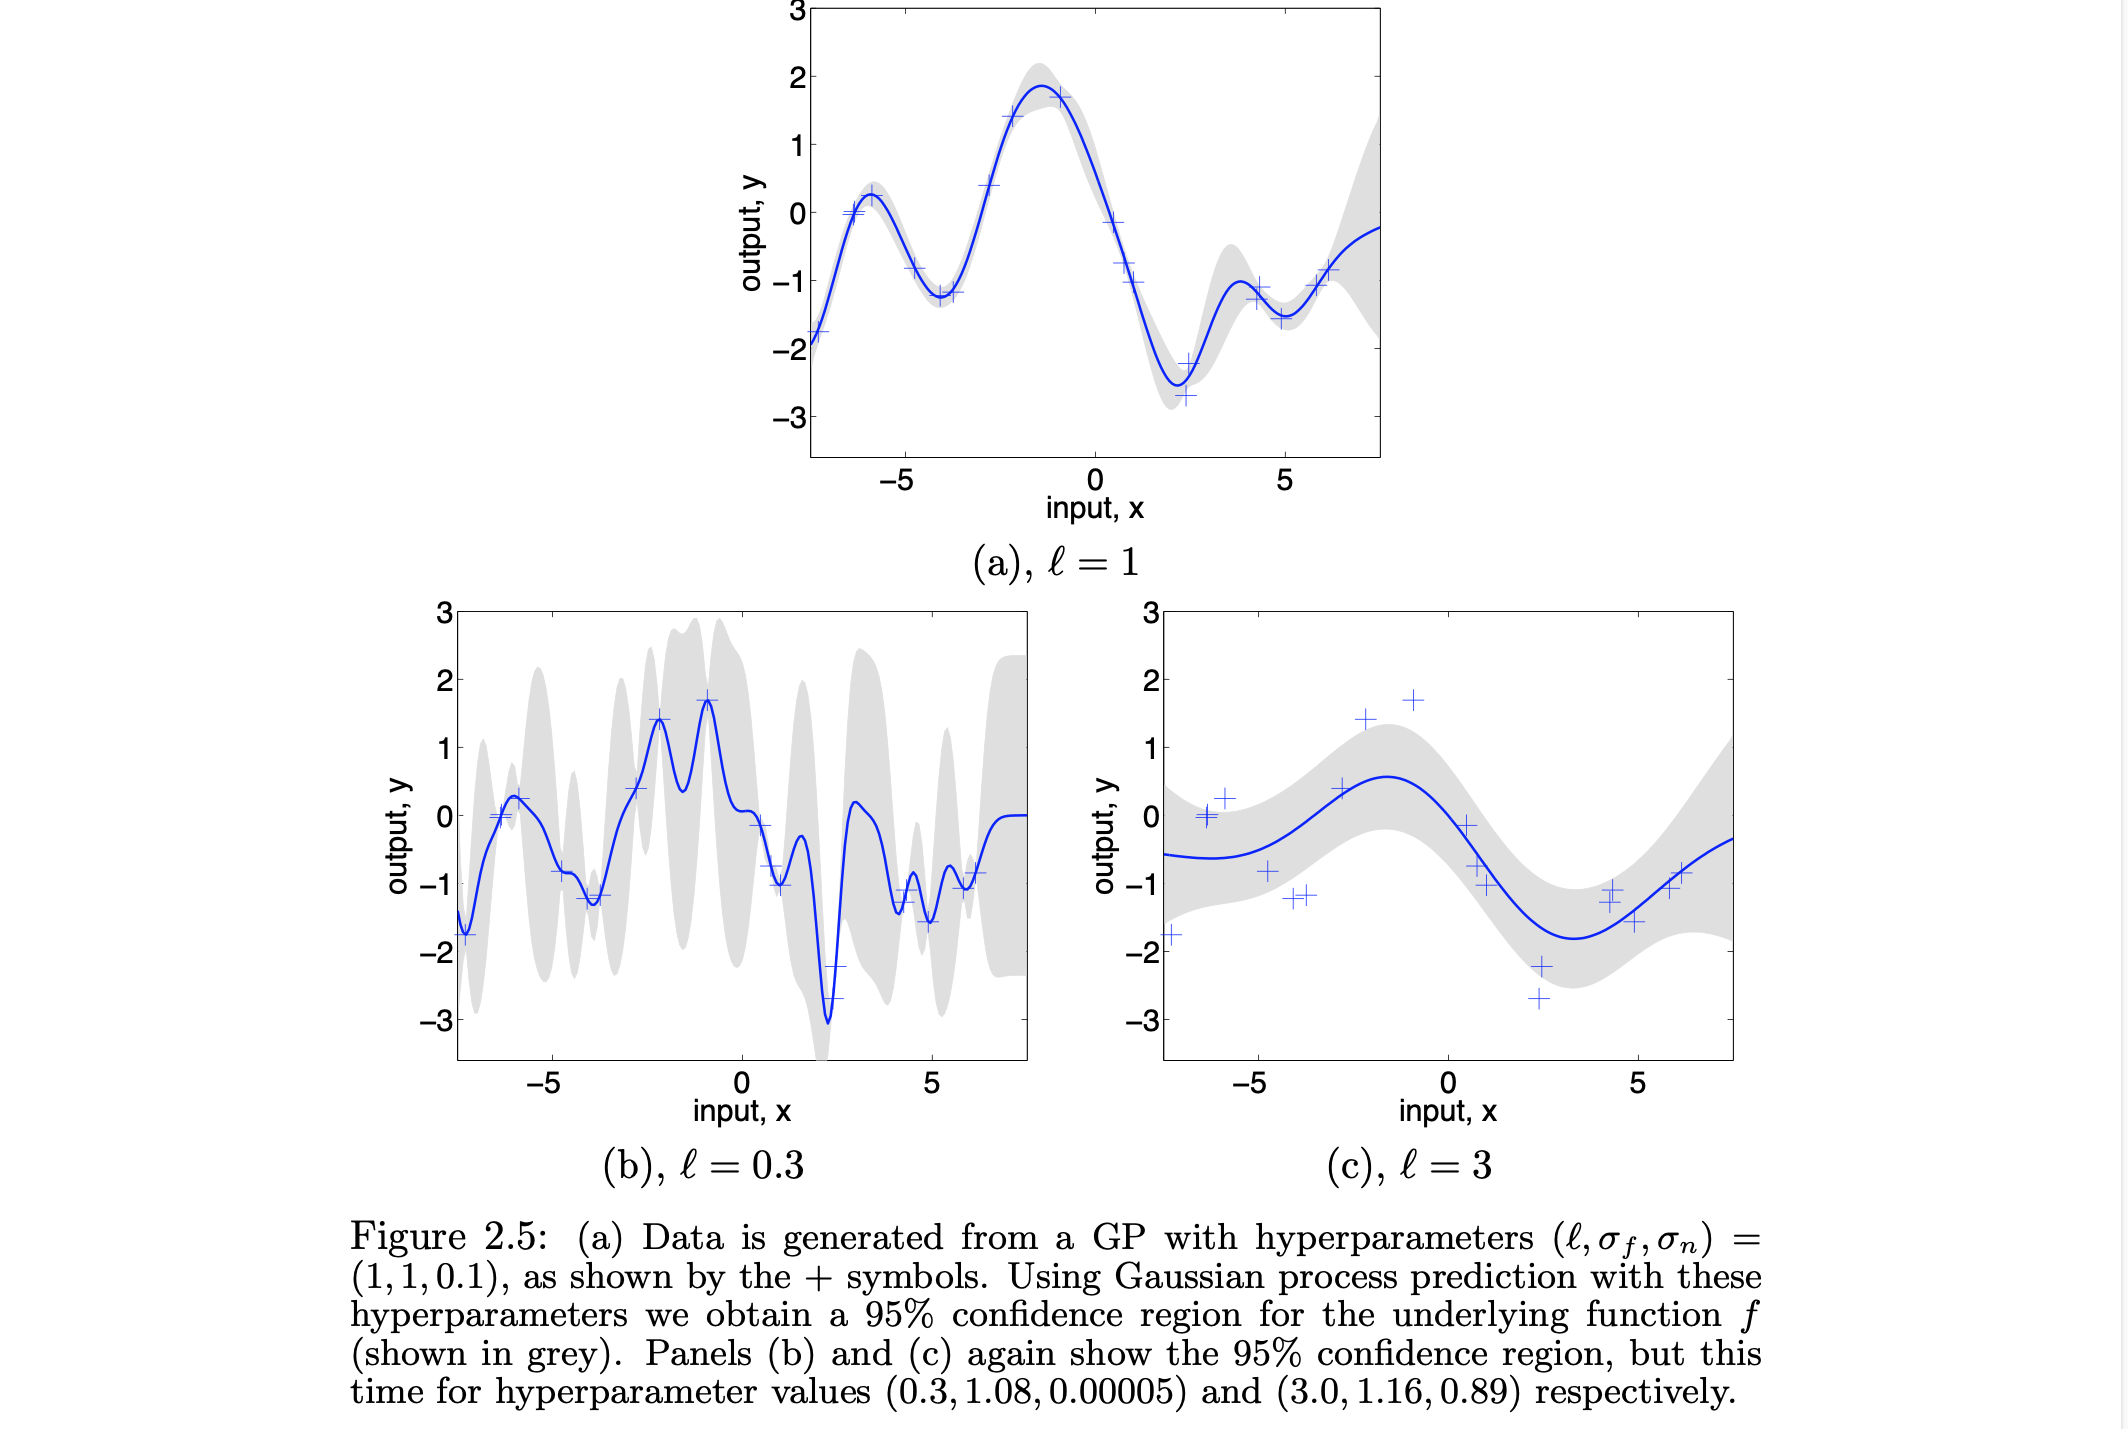

In [44]:
Image(filename='fig_2.5.png')

# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define functions

In [38]:
def covariance(vector1, vector2, theta_f=1, l=1):
    res = np.zeros([len(vector1), len(vector2)])
    for i in range(0,len(vector1)):
        for j in range(0, len(vector2)):
            res[i][j] = theta_f * np.exp(-0.5 * ((vector1[i] - vector2[j])/ l)**2)
    return res

# Replication of Figure 2.4

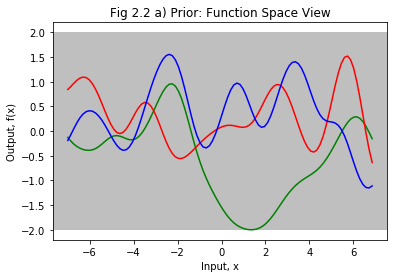

In [35]:
X_test = np.arange(-7, 7, (14/100))
covar = covariance(X_test, X_test, l = 1, theta_f = 1)
mean = [0] * len(X_test)

f1 = np.random.multivariate_normal(mean, covar)
f2 = np.random.multivariate_normal(mean, covar)
f3 = np.random.multivariate_normal(mean, covar)

sns.lineplot(x = X_test, y= f1, color = 'g').set(title = 'Fig 2.2 a) Prior: Function Space View', xlabel = 'Input, x', ylabel = 'Output, f(x)')
sns.lineplot(x = X_test, y= f2, color = 'r')
sns.lineplot(x = X_test, y= f3, color = 'b')

plt.axhspan(-2* params[1], 2* params[1], color='grey', alpha=0.5, lw=0)
plt.savefig('shade.png', dpi=300)
plt.show()

# Replication of Figure 2.5

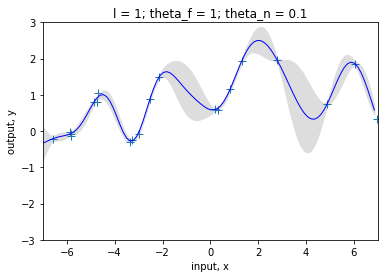

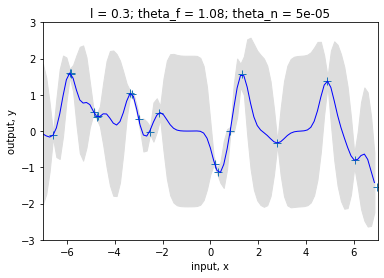

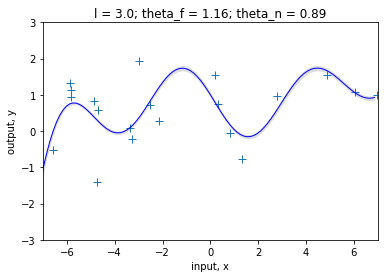

In [42]:
# Define all combinations of hyperparameters
params = [[1, 1, 0.1], [0.3, 1.08, 0.00005],  [3.0, 1.16, 0.89]]
# Define x test and train sets
X_test = np.arange(-7, 7, (14/100)) # Equidistant points along number line between -7,7
X_train = np.random.uniform(-7,7, 20).reshape(20,1) # 20 uniformly random points on the (-7, 7) number line

for p in params:

    # Select hyperparameters for this round
    l = p[0]
    theta_f = p[1]
    theta_n = p[2]

    # Calculate covariance matrices using this round's hyperparameters
    K = covariance(X_train, X_train, theta_f = theta_f, l = l) 
    K_s = covariance(X_train, X_test, theta_f= theta_f, l = l)
    K_ss = covariance(X_test, X_test, theta_f = theta_f,l = l)

    # Define Y_train
    """ Using 20 randomly-drawn training points; Compute their function values by taking a single draw from the prior for these points. """
    noise = np.random.normal(0, theta_n, len(X_train)) # Generate iid random noise using this round's noise hyperparameters
    
    
    Y_train = np.random.multivariate_normal([0] * len(K), K).reshape(len(X_train),1)                                                                                
    Y_train = [j + noise[i] for i,j in enumerate(Y_train)] # Add noise


    stability = 0.001 * np.identity(len(K))
    L = np.linalg.cholesky(np.add(K, stability)) # Add small value to K diagonal to ensure stability

    # Compute the mean at our test points.
    Lk = np.linalg.solve(L, K_s)
    mu = np.dot(Lk.T, np.linalg.solve(L, Y_train)).reshape((100,))

    # Compute the standard deviation so we can plot it
    s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
    stdv = np.sqrt(s2)


    plt.plot(X_train, Y_train, '+', ms=8)
    plt.gca().fill_between(X_test.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
    plt.plot(X_test, mu, 'b-', lw=1)
    plt.xlabel('input, x')
    plt.ylabel('output, y')
    plt.axis([-7, 7, -3, 3])
    plt.title('l = '+ str(l)+ '; theta_f = ' + str(theta_f) + '; theta_n = ' + str(theta_n))
    plt.show()
